<a href="https://colab.research.google.com/github/endohiroya2020/colab_sample/blob/master/Section_04/simple_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# シンプルなディープラーニング
Kerasを使って、最小限のディープラーニングを実装します。

## データの読み込み
Irisデータセットを読み込みます。  
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])  # データを10個表示
print(iris.target[:10])  # ラベルを10個表示
print(iris.data.shape)  # データの形状を表示

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


## データの前処理
データの前処理として、標準化を行います。  
標準化は、平均値が0、標準偏差が1になるように変換する処理です。  
https://scikit-learn.org/stable/modules/preprocessing.html  
  
ラベルをone-hot表現に変換します。  
one-hot表現は、一箇所だけ1で残りは０の配列です。  
https://keras.io/ja/utils/np_utils/

In [2]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()  # 標準化のためのスケーラー
scaler.fit(iris.data)  # パラメータの計算
x = scaler.transform(iris.data)  # データの変換
print(x[:10])

t = np_utils.to_categorical(iris.target)  # ラベルをone-hot表現に変換
print(t[:10])

Using TensorFlow backend.


[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


## 訓練データとテストデータ
データを訓練用のデータとテスト用のデータに分割します。  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [4]:
from sklearn.model_selection import train_test_split

# x_train: 訓練用の入力データ
# x_test: テスト用の入力データ
# t_train: 訓練用の正解データ
# t_test: テスト用の正解データ
# train_size=0.75: 75%が訓練用、25%がテスト用
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)
print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


## モデルの構築
4層からなる、シンプルなディープラーニングのモデルを構築します。  
**Sequentilal**: 単純に層を積み重ねるモデル  
https://keras.io/ja/models/sequential/

**Dense**: 全結合層  
https://keras.io/ja/layers/core/#dense  

**Activation**: 活性化関数  
https://keras.io/ja/layers/core/#activation  

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4)) # 4つの特徴が入力なので、入力層のニューロン数は4、中間層のニューロン数は32
model.add(Activation('relu')) # 活性化関数（ReLU）を追加
model.add(Dense(32)) # ニューロン数32の全結合層を追加
model.add(Activation('relu')) # 活性化関数（ReLU）を追加
model.add(Dense(3)) # 3つに分類するので、出力層のニューロン数は3
model.add(Activation('softmax')) # 3つ以上の分類にはソフトマックス関数を使用
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['acc']) # モデルのコンパイル

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                160       
_________________________________________________________________
activation_7 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_8 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 99        
_________________________________________________________________
activation_9 (Activation)    (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
____________________________________________________

## 学習
訓練用の入力データと正解データを使って、モデルを訓練します。  
**fit**: モデルを訓練する  
https://keras.io/ja/models/sequential/#fit  

In [18]:
history = model.fit(x_train, t_train, nb_epoch=30, batch_size=8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
112/112 [==============================] - 0s 503us/step - loss: 1.1845 - acc: 0.3750
Epoch 2/30
112/112 [==============================] - 0s 148us/step - loss: 1.1082 - acc: 0.4911
Epoch 3/30
112/112 [==============================] - 0s 152us/step - loss: 1.0463 - acc: 0.5446
Epoch 4/30
112/112 [==============================] - 0s 154us/step - loss: 0.9912 - acc: 0.5357
Epoch 5/30
112/112 [==============================] - 0s 164us/step - loss: 0.9383 - acc: 0.5625
Epoch 6/30
112/112 [==============================] - 0s 170us/step - loss: 0.8867 - acc: 0.6429
Epoch 7/30
112/112 [==============================] - 0s 159us/step - loss: 0.8376 - acc: 0.7679
Epoch 8/30
112/112 [==============================] - 0s 140us/step - loss: 0.7897 - acc: 0.8482
Epoch 9/30
112/112 [==============================] - 0s 148us/step - loss: 0.7438 - acc: 0.8571
Epoch 10/30
112/112 [==============================] - 0s 143us/step - loss: 0.7006 - acc: 0.8482
Epoch 11/30
112/112 [========

## 学習の推移
Historyには学習の経過が記録されています。  
これを使って、学習の推移を表示します。

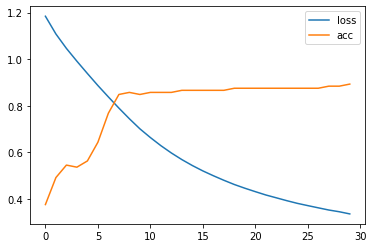

In [19]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']  # 訓練用データの誤差
hist_acc = history.history['acc']  # 検証用データの誤差

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='acc')
plt.legend()
plt.show()

## 評価
モデルの評価を行います。  
**evaluate**: 入力、正解データから誤差などを計算します。  
https://keras.io/ja/models/sequential/#evaluate

In [20]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

38/38 [==============================] - 0s 680us/step
0.35859968395609604 0.8947368264198303


## 予測
学習済みのモデルを使って予測を行います。  
**predict**: モデルを使って入力を出力に変換します。  
https://keras.io/ja/models/sequential/#predict

In [21]:
model.predict(x_test)

array([[0.97497034, 0.01474576, 0.01028391],
       [0.97543937, 0.01584746, 0.00871318],
       [0.99206525, 0.00485481, 0.00307998],
       [0.9810215 , 0.01157178, 0.00740675],
       [0.9916055 , 0.00495672, 0.00343777],
       [0.01447007, 0.1682525 , 0.81727743],
       [0.08166166, 0.6075046 , 0.3108337 ],
       [0.07028583, 0.48706645, 0.44264773],
       [0.06493144, 0.38204652, 0.5530221 ],
       [0.05289594, 0.3708497 , 0.57625437],
       [0.02823652, 0.5098269 , 0.4619366 ],
       [0.97813064, 0.01309287, 0.00877639],
       [0.02860274, 0.53095627, 0.440441  ],
       [0.07777148, 0.405295  , 0.51693344],
       [0.06648429, 0.2532439 , 0.68027174],
       [0.07914127, 0.49504536, 0.4258134 ],
       [0.04124888, 0.22400218, 0.73474896],
       [0.03539504, 0.2606573 , 0.7039476 ],
       [0.98712105, 0.00758198, 0.00529704],
       [0.0257832 , 0.18363215, 0.7905847 ],
       [0.14293127, 0.57139534, 0.28567338],
       [0.9717773 , 0.01661289, 0.01160982],
       [0.

## モデルの保存
学習済みのモデルを保存します。  
**save**: モデルを保存します。  
**load_model**: 保存されたモデルを読み込みます。    
https://keras.io/ja/getting-started/faq/#_4  

In [22]:
from keras.models import load_model

model.save('model.h5')
load_model('model.h5')